선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

## 실습 데이터 생성

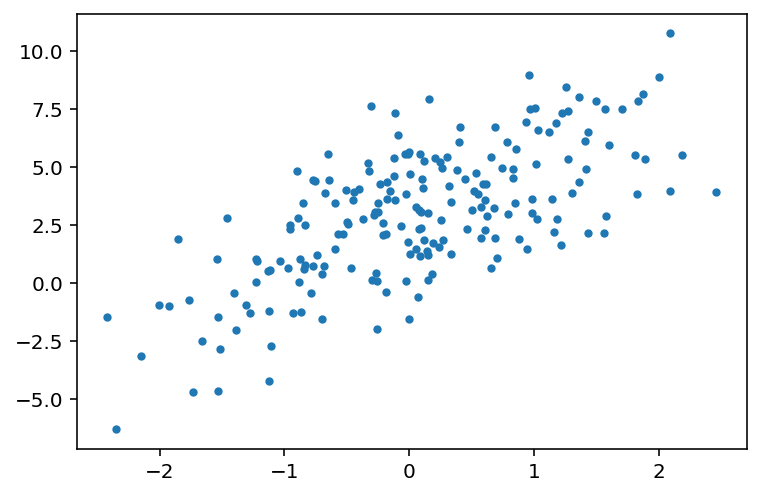

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

## 선형회귀 모델 사용

In [39]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[2.00405374]
2.8507776348472205


In [40]:
leg.coef_[0]

2.0040537387596085

In [41]:
leg.intercept_

2.8507776348472205

## 회귀직선

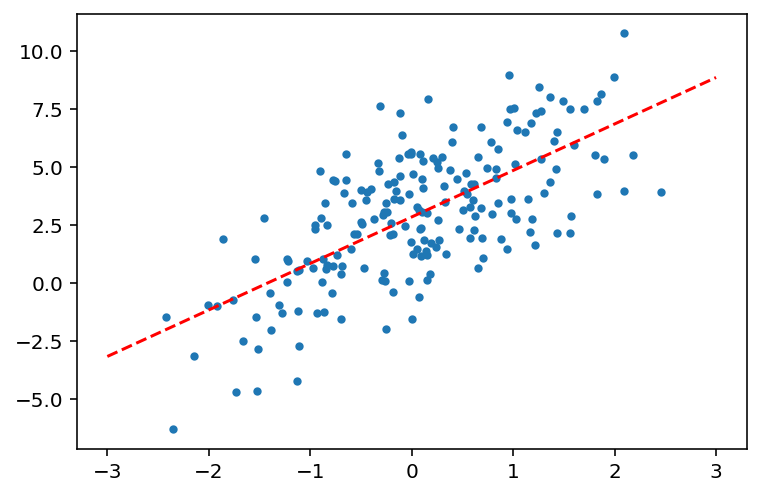

In [42]:
a, b = leg.coef_, leg.intercept_
xs = np.linspace(-3, 3, 2)
plt.plot(xs, a*xs + b, "r--")
plt.scatter(x,y, s=10)

## 남여 키-몸무게-성별 예측

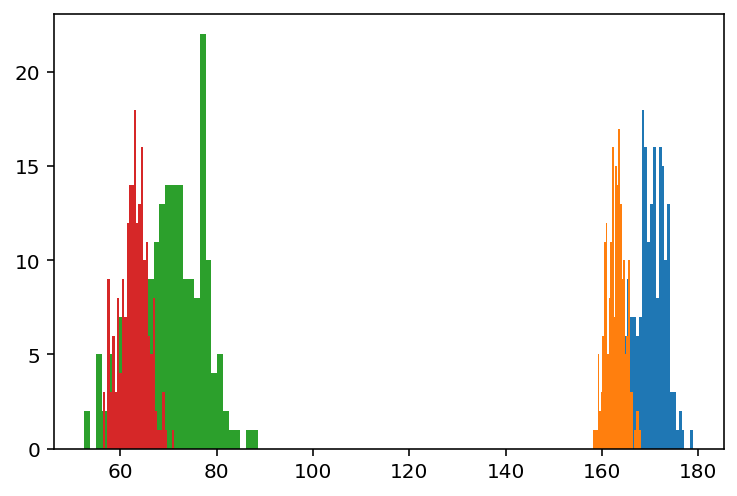

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200 #  사람수 남여, 각각
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 163

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [44]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측
X_train, X_test, y_train, y_test = train_test_split(x2, y2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

# R-square 점수
leg1.score(X_test.reshape(-1,1), y_test)

0.5638538016286923

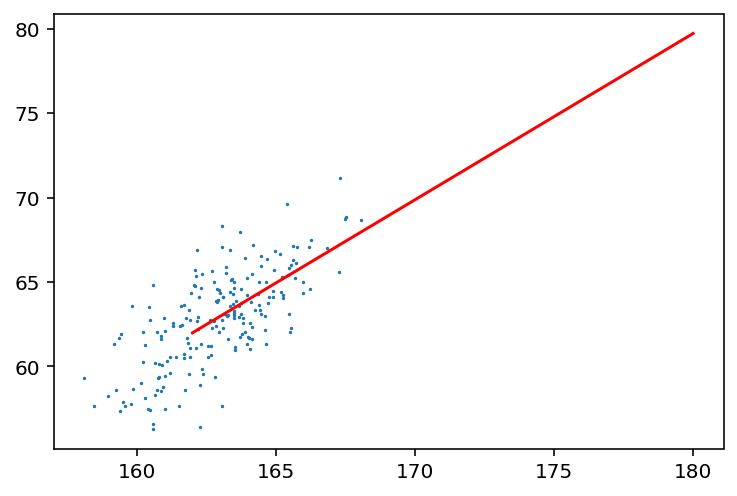

In [45]:
xs = np.linspace(162,180,2)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

## 남여 데이터를 합친 데이터 (400명)

In [46]:
x = np.concatenate((x1, x2)) # np.hstack((x1,x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.761191263243441

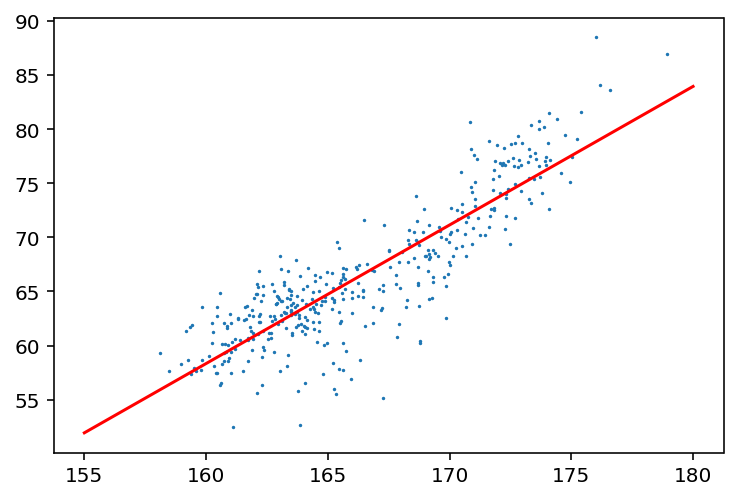

In [47]:
xs = np.linspace(155,180,2)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [48]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':1})
X2 = pd.DataFrame({'height':x2, 'sex':0})
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,174.414680,1
1,163.376915,1
2,172.508110,1
3,164.574716,1
4,168.667958,1
...,...,...
395,162.155542,0
396,161.206203,0
397,159.828259,0
398,165.457866,0


In [49]:
# sex = [0]*n_samples + [1]*n_samples

In [50]:
# X = pd.DataFrame(x)
# X['sex'] = sex
# X

In [51]:
np.random.seed(19)
X_train, X_test, y_train, y_test = train_test_split(X, y)
leg = LinearRegression()
leg.fit(X_train, y_train)

leg.score(X_test, y_test)

0.8242366861116266

## 성별을 고려하여 성능이 개선됨

In [52]:
print(leg.coef_)
print(leg.intercept_)

[ 1.69988583 -4.34613256]
-214.30227072679492


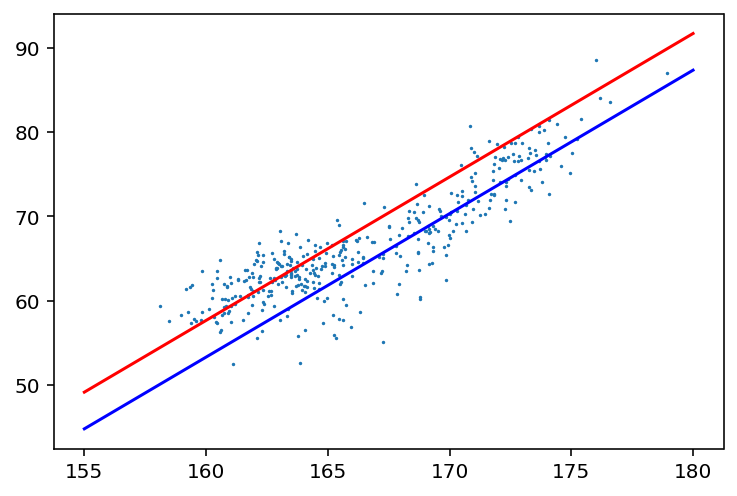

In [53]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
ys = xs * leg.coef_[0] + leg.coef_[1]*1 + leg.intercept_
plt.plot(xs, ys, c='b')
ys = xs * leg.coef_[0] + leg.coef_[1]*0 + leg.intercept_
plt.plot(xs, ys, c='r')

# 선형 분류

In [54]:
X["weight"] = y
X[:10]

,height,sex,weight
0,174.414680,1,80.989855
1,163.376915,1,59.086482
2,172.508110,1,78.658902
3,164.574716,1,60.370312
4,168.667958,1,71.500912
5,171.684800,1,72.611283
6,164.509184,1,63.886725
7,169.662082,1,70.080973
8,175.017978,1,77.458353
9,170.038856,1,70.497480


In [55]:

y = X["sex"] ;y[:5]

0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [56]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,174.414680,80.989855
1,163.376915,59.086482
2,172.508110,78.658902
3,164.574716,60.370312
4,168.667958,71.500912


In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
clf = SGDClassifier() # (1) 모델 정의
clf.fit(X_train, y_train) #(2) 학습
clf.score(X_test, y_test) # accuracy

0.92

In [58]:
y_pred = clf.predict(X_test) # (3) 모델 사용

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [60]:
confusion_matrix(y_test, y_pred)

array([[44,  5],
       [ 3, 48]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        49
           1       0.91      0.94      0.92        51

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [62]:
clf.coef_, clf.intercept_

(array([[12.97575432, -4.50056204]]), array([1.08612774]))

In [63]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

In [64]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

In [65]:
m1,m2, s1, s2

(166.4272907607887, 66.50355106276446, 4.377807821427905, 6.452806783987484)

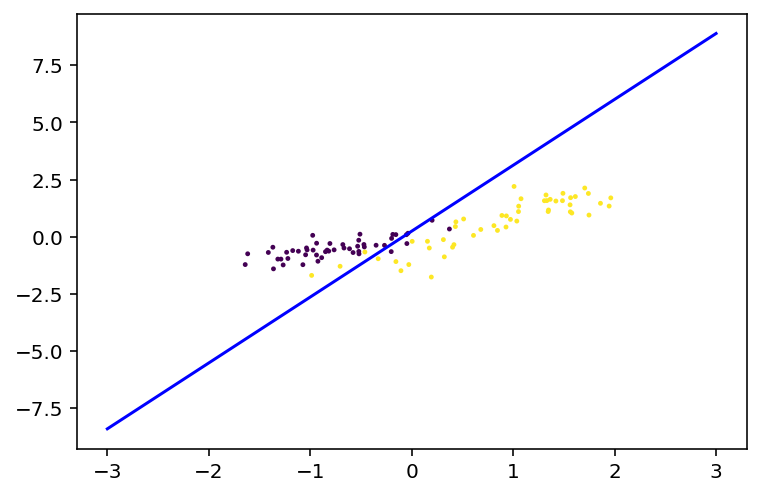

In [66]:
xs = np.linspace(-3,3,2)
plt.scatter(X_test[:,0],X_test[:,1], s=2, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

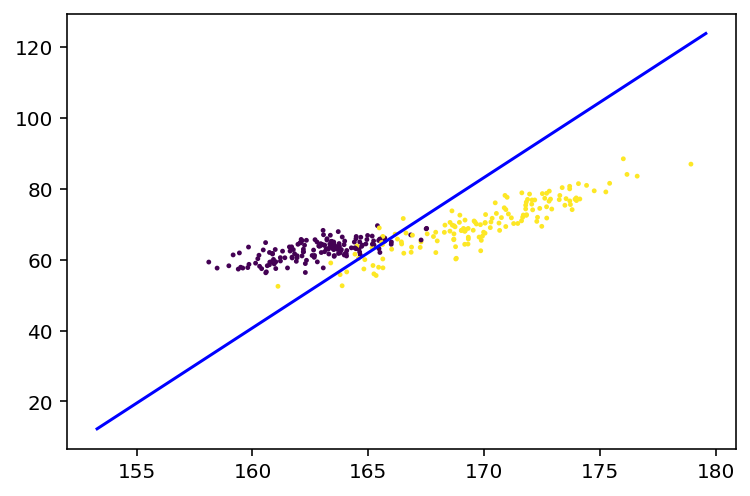

In [67]:
xs = np.linspace(-3,3,3)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [68]:
scores = clf.decision_function(X_test)

#SGD의 decision_function : 결정 함수

In [69]:
scores

array([-2.27139517e+00,  1.41143557e+01,  1.35878556e+01, -4.98740267e+00,
        1.12711272e+01, -8.02933242e+00,  1.95061350e+01,  8.50187004e+00,
       -1.88762574e+00,  8.73368010e+00,  1.51752907e+01, -1.01519703e+01,
       -1.05386514e+01, -7.08680488e+00, -7.31322509e+00,  4.65109376e-01,
       -3.28563644e+00,  2.06846008e+00,  1.69078768e+01,  1.15461238e+01,
        1.33283213e+01, -4.09030276e+00, -6.29485678e+00,  3.82023211e+00,
        8.38127564e+00, -6.67747385e+00,  9.80361150e+00, -8.87593065e+00,
       -8.91655198e+00,  1.09801253e+01,  1.03097217e+01, -1.18417313e+01,
       -1.41430637e+01, -3.48519302e+00, -1.34797117e+00,  1.50679089e+01,
        1.86561174e+01,  4.39947822e+00, -6.16936178e+00, -6.02175931e+00,
        4.68628512e+00,  1.18908565e+01,  5.57088616e+00,  1.37277275e+01,
       -1.13922139e+01, -1.47142120e+01, -1.18373343e+01, -9.78769817e+00,
       -6.07081587e+00,  1.08221407e+01,  1.40848493e+00, -1.77918733e+00,
        7.59618815e+00, -

In [70]:
fpr = dict()  #딕셔너리
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

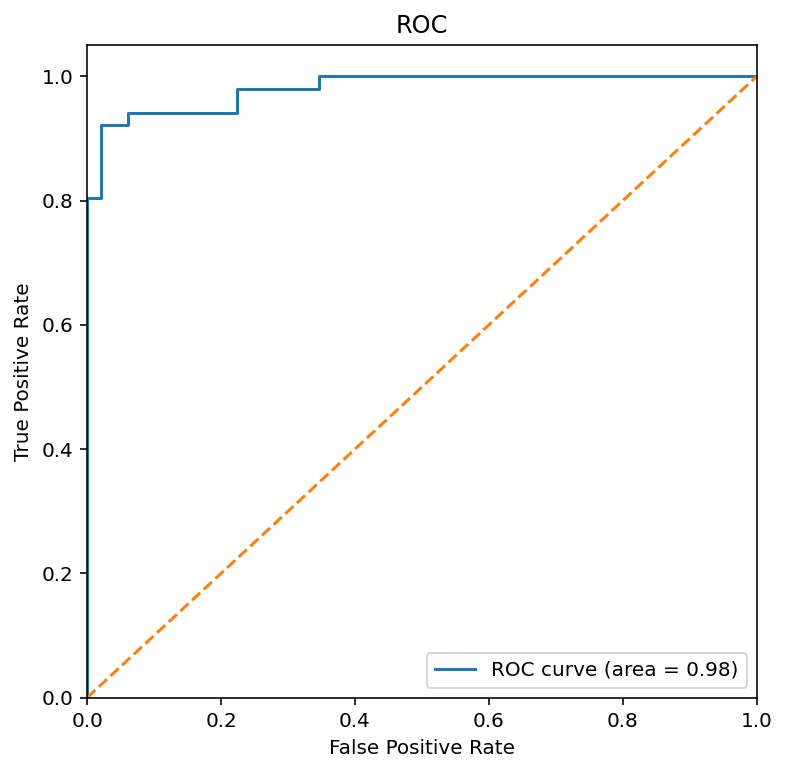

In [71]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) 랜덤 포레스트를 사용하는 경우

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20) # (1)
clf.fit(X_train, y_train) #(2)
clf.score(X_test, y_test)

0.92

## (참고) ROC 성능 비교

In [73]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


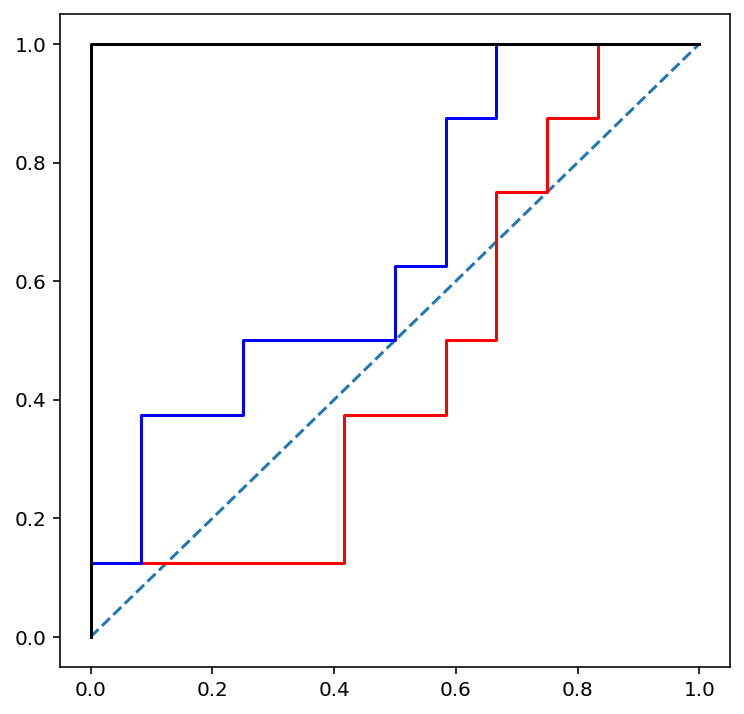

In [74]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])

## ---------------------------------------------------------------------------------------------------------------